In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
import tensorflow.keras.utils as utils # 원핫인코딩
import pandas as pd                    # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense # model.add해서 layer 쌓을 때
from matplotlib import pyplot as plt # 학습과정의 loss, acc 볼 때
import numpy as np
np.random.seed(3)

In [4]:
# 1. 데이터 셋 준비하기
# 훈련셋, 테스트셋 분리
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
print(X_train[0].shape)
for row in X_train[0]:
    for pixel in row:
        print("{:3d} ".format(pixel), end='')
    print()

(28, 28)
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0

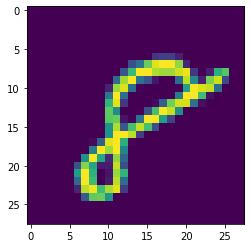

In [7]:
plt.imshow(X_train[59999])

In [8]:
Y_train[59999]

8

In [9]:
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [10]:
# 훈련셋(학습할 때 사용), 검증셋(학습할 때 사용), 훈련셋(평가할 때)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [11]:
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test  = X_test.reshape(10000, 784).astype('float32') / 255.0

In [12]:
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [13]:
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs   = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [14]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((700, 784), (700,), (300, 784), (300,))

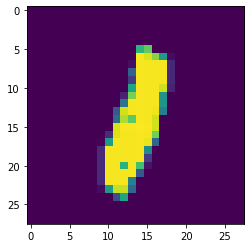

In [15]:
plt.imshow(X_train[0].reshape(28,28))

In [16]:
Y_train[0]

1

In [17]:
Y_train.shape, Y_val.shape, Y_test.shape

((700,), (300,), (10000,))

In [18]:
# 원핫인코딩 방법1
sampledata = np.array([1,2,3])
pd.get_dummies(sampledata).values

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [19]:
# 원핫인코딩 방법2
utils.to_categorical(sampledata)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [20]:
# 원핫인코딩 = 라벨링 전환
# 1 -> 0 1 0 0 0 0 0 0 0 0
# 9 -> 0 0 0 0 0 0 0 0 0 1
Y_train = utils.to_categorical(Y_train, 10)
Y_val   = utils.to_categorical(Y_val, 10)
Y_test  = utils.to_categorical(Y_test, 10)

In [21]:
Y_train.shape, Y_val.shape, Y_test.shape

((700, 10), (300, 10), (10000, 10))

In [22]:
print(Y_train[0])
print(Y_train[0].argmax())
# 귀찮은 데이터 전처리 끝

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


In [23]:
# 2. 모델 구성하기
# from tensorflow.keras.layers import Activation
# relu = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])


# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=100,
                validation_data=(X_val, Y_val))

Epoch 1/1000
7/7 [==============================] - 0s 27ms/step - loss: 2.3316 - accuracy: 0.1343 - val_loss: 2.3114 - val_accuracy: 0.1067
Epoch 2/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.3150 - accuracy: 0.1357 - val_loss: 2.3001 - val_accuracy: 0.1100
Epoch 3/1000
7/7 [==============================] - 0s 5ms/step - loss: 2.3029 - accuracy: 0.1457 - val_loss: 2.2916 - val_accuracy: 0.1100
Epoch 4/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2943 - accuracy: 0.1543 - val_loss: 2.2840 - val_accuracy: 0.1200
Epoch 5/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2872 - accuracy: 0.1686 - val_loss: 2.2776 - val_accuracy: 0.1267
Epoch 6/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2813 - accuracy: 0.1714 - val_loss: 2.2719 - val_accuracy: 0.1367
Epoch 7/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2757 - accuracy: 0.1729 - val_loss: 2.2664 - val_accuracy: 0.1467
Epoch 8/1000
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.9262 - accuracy: 0.2614 - val_loss: 1.9872 - val_accuracy: 0.1900
Epoch 60/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9225 - accuracy: 0.2729 - val_loss: 1.9838 - val_accuracy: 0.2033
Epoch 61/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.9186 - accuracy: 0.2757 - val_loss: 1.9802 - val_accuracy: 0.2067
Epoch 62/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.9150 - accuracy: 0.2814 - val_loss: 1.9770 - val_accuracy: 0.2067
Epoch 63/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.9113 - accuracy: 0.2814 - val_loss: 1.9736 - val_accuracy: 0.2100
Epoch 64/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.9074 - accuracy: 0.2786 - val_loss: 1.9703 - val_accuracy: 0.2100
Epoch 65/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.9039 - accuracy: 0.2814 - val_loss: 1.9670 - val_accuracy: 0.2067
Epoch 66/1000
7/7 [========

7/7 [==============================] - 0s 4ms/step - loss: 1.7506 - accuracy: 0.3557 - val_loss: 1.8174 - val_accuracy: 0.2900
Epoch 118/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7483 - accuracy: 0.3543 - val_loss: 1.8149 - val_accuracy: 0.2867
Epoch 119/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7455 - accuracy: 0.3543 - val_loss: 1.8125 - val_accuracy: 0.2867
Epoch 120/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7431 - accuracy: 0.3600 - val_loss: 1.8100 - val_accuracy: 0.2900
Epoch 121/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7408 - accuracy: 0.3571 - val_loss: 1.8075 - val_accuracy: 0.2900
Epoch 122/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7387 - accuracy: 0.3571 - val_loss: 1.8049 - val_accuracy: 0.2900
Epoch 123/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7358 - accuracy: 0.3600 - val_loss: 1.8027 - val_accuracy: 0.2967
Epoch 124/1000
7/7 [=

Epoch 175/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6219 - accuracy: 0.4286 - val_loss: 1.6954 - val_accuracy: 0.3667
Epoch 176/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6199 - accuracy: 0.4343 - val_loss: 1.6937 - val_accuracy: 0.3733
Epoch 177/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6178 - accuracy: 0.4329 - val_loss: 1.6919 - val_accuracy: 0.3767
Epoch 178/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6161 - accuracy: 0.4286 - val_loss: 1.6902 - val_accuracy: 0.3733
Epoch 179/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6139 - accuracy: 0.4300 - val_loss: 1.6884 - val_accuracy: 0.3767
Epoch 180/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6120 - accuracy: 0.4314 - val_loss: 1.6866 - val_accuracy: 0.3700
Epoch 181/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6101 - accuracy: 0.4343 - val_loss: 1.6850 - val_accuracy: 0.3733
Epoch 

Epoch 233/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5212 - accuracy: 0.4557 - val_loss: 1.6024 - val_accuracy: 0.4067
Epoch 234/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5198 - accuracy: 0.4600 - val_loss: 1.6008 - val_accuracy: 0.4067
Epoch 235/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5178 - accuracy: 0.4557 - val_loss: 1.5993 - val_accuracy: 0.4100
Epoch 236/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.5165 - accuracy: 0.4600 - val_loss: 1.5978 - val_accuracy: 0.4100
Epoch 237/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.5150 - accuracy: 0.4557 - val_loss: 1.5966 - val_accuracy: 0.4100
Epoch 238/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5133 - accuracy: 0.4557 - val_loss: 1.5953 - val_accuracy: 0.4133
Epoch 239/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5117 - accuracy: 0.4614 - val_loss: 1.5941 - val_accuracy: 0.4133
Epoch 

Epoch 291/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4404 - accuracy: 0.4686 - val_loss: 1.5258 - val_accuracy: 0.4467
Epoch 292/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4392 - accuracy: 0.4729 - val_loss: 1.5247 - val_accuracy: 0.4467
Epoch 293/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4382 - accuracy: 0.4714 - val_loss: 1.5232 - val_accuracy: 0.4600
Epoch 294/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4372 - accuracy: 0.4743 - val_loss: 1.5222 - val_accuracy: 0.4600
Epoch 295/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4354 - accuracy: 0.4700 - val_loss: 1.5209 - val_accuracy: 0.4633
Epoch 296/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4342 - accuracy: 0.4700 - val_loss: 1.5199 - val_accuracy: 0.4667
Epoch 297/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4329 - accuracy: 0.4729 - val_loss: 1.5189 - val_accuracy: 0.4667
Epoch 

Epoch 349/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3741 - accuracy: 0.4957 - val_loss: 1.4633 - val_accuracy: 0.5000
Epoch 350/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3732 - accuracy: 0.4986 - val_loss: 1.4622 - val_accuracy: 0.4967
Epoch 351/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3724 - accuracy: 0.5000 - val_loss: 1.4610 - val_accuracy: 0.5000
Epoch 352/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.3711 - accuracy: 0.4986 - val_loss: 1.4602 - val_accuracy: 0.5067
Epoch 353/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3702 - accuracy: 0.5014 - val_loss: 1.4591 - val_accuracy: 0.5067
Epoch 354/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3690 - accuracy: 0.5000 - val_loss: 1.4582 - val_accuracy: 0.5100
Epoch 355/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3679 - accuracy: 0.4971 - val_loss: 1.4571 - val_accuracy: 0.5100
Epoch 

Epoch 407/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3192 - accuracy: 0.5129 - val_loss: 1.4142 - val_accuracy: 0.5200
Epoch 408/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3188 - accuracy: 0.5057 - val_loss: 1.4134 - val_accuracy: 0.5233
Epoch 409/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3175 - accuracy: 0.5086 - val_loss: 1.4125 - val_accuracy: 0.5233
Epoch 410/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3169 - accuracy: 0.5143 - val_loss: 1.4116 - val_accuracy: 0.5233
Epoch 411/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3159 - accuracy: 0.5129 - val_loss: 1.4109 - val_accuracy: 0.5233
Epoch 412/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3156 - accuracy: 0.5114 - val_loss: 1.4103 - val_accuracy: 0.5267
Epoch 413/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3147 - accuracy: 0.5171 - val_loss: 1.4099 - val_accuracy: 0.5233
Epoch 

Epoch 465/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2740 - accuracy: 0.5486 - val_loss: 1.3767 - val_accuracy: 0.5467
Epoch 466/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2728 - accuracy: 0.5529 - val_loss: 1.3756 - val_accuracy: 0.5467
Epoch 467/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2725 - accuracy: 0.5457 - val_loss: 1.3752 - val_accuracy: 0.5467
Epoch 468/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2711 - accuracy: 0.5500 - val_loss: 1.3744 - val_accuracy: 0.5467
Epoch 469/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.2707 - accuracy: 0.5500 - val_loss: 1.3744 - val_accuracy: 0.5500
Epoch 470/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2701 - accuracy: 0.5443 - val_loss: 1.3739 - val_accuracy: 0.5500
Epoch 471/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2695 - accuracy: 0.5471 - val_loss: 1.3733 - val_accuracy: 0.5500
Epoch 

Epoch 523/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2349 - accuracy: 0.5500 - val_loss: 1.3481 - val_accuracy: 0.5533
Epoch 524/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2341 - accuracy: 0.5543 - val_loss: 1.3470 - val_accuracy: 0.5533
Epoch 525/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2336 - accuracy: 0.5529 - val_loss: 1.3466 - val_accuracy: 0.5533
Epoch 526/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2330 - accuracy: 0.5557 - val_loss: 1.3465 - val_accuracy: 0.5533
Epoch 527/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2321 - accuracy: 0.5529 - val_loss: 1.3460 - val_accuracy: 0.5500
Epoch 528/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2317 - accuracy: 0.5529 - val_loss: 1.3459 - val_accuracy: 0.5533
Epoch 529/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2309 - accuracy: 0.5529 - val_loss: 1.3453 - val_accuracy: 0.5533
Epoch 

Epoch 581/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2010 - accuracy: 0.5686 - val_loss: 1.3275 - val_accuracy: 0.5633
Epoch 582/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2006 - accuracy: 0.5671 - val_loss: 1.3272 - val_accuracy: 0.5633
Epoch 583/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2004 - accuracy: 0.5729 - val_loss: 1.3274 - val_accuracy: 0.5600
Epoch 584/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1999 - accuracy: 0.5700 - val_loss: 1.3268 - val_accuracy: 0.5633
Epoch 585/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1989 - accuracy: 0.5700 - val_loss: 1.3264 - val_accuracy: 0.5600
Epoch 586/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1983 - accuracy: 0.5700 - val_loss: 1.3263 - val_accuracy: 0.5600
Epoch 587/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1978 - accuracy: 0.5700 - val_loss: 1.3258 - val_accuracy: 0.5567
Epoch 

Epoch 639/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1723 - accuracy: 0.5800 - val_loss: 1.3121 - val_accuracy: 0.5733
Epoch 640/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1712 - accuracy: 0.5800 - val_loss: 1.3122 - val_accuracy: 0.5733
Epoch 641/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1716 - accuracy: 0.5800 - val_loss: 1.3126 - val_accuracy: 0.5733
Epoch 642/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1709 - accuracy: 0.5843 - val_loss: 1.3119 - val_accuracy: 0.5700
Epoch 643/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1706 - accuracy: 0.5829 - val_loss: 1.3119 - val_accuracy: 0.5667
Epoch 644/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1695 - accuracy: 0.5829 - val_loss: 1.3117 - val_accuracy: 0.5700
Epoch 645/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1699 - accuracy: 0.5786 - val_loss: 1.3109 - val_accuracy: 0.5667
Epoch 

Epoch 697/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1458 - accuracy: 0.5957 - val_loss: 1.3013 - val_accuracy: 0.5733
Epoch 698/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1458 - accuracy: 0.5929 - val_loss: 1.3017 - val_accuracy: 0.5733
Epoch 699/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1448 - accuracy: 0.5957 - val_loss: 1.3011 - val_accuracy: 0.5733
Epoch 700/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1448 - accuracy: 0.5929 - val_loss: 1.3018 - val_accuracy: 0.5767
Epoch 701/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1445 - accuracy: 0.5971 - val_loss: 1.3012 - val_accuracy: 0.5767
Epoch 702/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1436 - accuracy: 0.5943 - val_loss: 1.3008 - val_accuracy: 0.5767
Epoch 703/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1431 - accuracy: 0.5929 - val_loss: 1.3009 - val_accuracy: 0.5733
Epoch 

Epoch 755/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1224 - accuracy: 0.6029 - val_loss: 1.2929 - val_accuracy: 0.5767
Epoch 756/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1225 - accuracy: 0.5971 - val_loss: 1.2932 - val_accuracy: 0.5733
Epoch 757/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1217 - accuracy: 0.6014 - val_loss: 1.2928 - val_accuracy: 0.5767
Epoch 758/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1210 - accuracy: 0.6029 - val_loss: 1.2925 - val_accuracy: 0.5767
Epoch 759/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1209 - accuracy: 0.6029 - val_loss: 1.2927 - val_accuracy: 0.5733
Epoch 760/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1212 - accuracy: 0.6029 - val_loss: 1.2923 - val_accuracy: 0.5767
Epoch 761/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1206 - accuracy: 0.6000 - val_loss: 1.2926 - val_accuracy: 0.5700
Epoch 

Epoch 813/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1016 - accuracy: 0.6086 - val_loss: 1.2847 - val_accuracy: 0.5733
Epoch 814/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1009 - accuracy: 0.6043 - val_loss: 1.2853 - val_accuracy: 0.5767
Epoch 815/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1009 - accuracy: 0.6043 - val_loss: 1.2849 - val_accuracy: 0.5733
Epoch 816/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1004 - accuracy: 0.6071 - val_loss: 1.2855 - val_accuracy: 0.5733
Epoch 817/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1000 - accuracy: 0.6071 - val_loss: 1.2859 - val_accuracy: 0.5733
Epoch 818/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0997 - accuracy: 0.6057 - val_loss: 1.2851 - val_accuracy: 0.5733
Epoch 819/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0989 - accuracy: 0.6100 - val_loss: 1.2853 - val_accuracy: 0.5767
Epoch 

Epoch 870/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0837 - accuracy: 0.6186 - val_loss: 1.2805 - val_accuracy: 0.5600
Epoch 871/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0822 - accuracy: 0.6157 - val_loss: 1.2811 - val_accuracy: 0.5667
Epoch 872/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0820 - accuracy: 0.6200 - val_loss: 1.2814 - val_accuracy: 0.5667
Epoch 873/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0816 - accuracy: 0.6186 - val_loss: 1.2817 - val_accuracy: 0.5633
Epoch 874/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0817 - accuracy: 0.6171 - val_loss: 1.2813 - val_accuracy: 0.5633
Epoch 875/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0813 - accuracy: 0.6186 - val_loss: 1.2815 - val_accuracy: 0.5633
Epoch 876/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0813 - accuracy: 0.6143 - val_loss: 1.2805 - val_accuracy: 0.5633
Epoch 

Epoch 928/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0649 - accuracy: 0.6257 - val_loss: 1.2791 - val_accuracy: 0.5600
Epoch 929/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0650 - accuracy: 0.6286 - val_loss: 1.2785 - val_accuracy: 0.5600
Epoch 930/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0645 - accuracy: 0.6243 - val_loss: 1.2781 - val_accuracy: 0.5600
Epoch 931/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.6286 - val_loss: 1.2784 - val_accuracy: 0.5633
Epoch 932/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0638 - accuracy: 0.6271 - val_loss: 1.2779 - val_accuracy: 0.5633
Epoch 933/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0637 - accuracy: 0.6257 - val_loss: 1.2778 - val_accuracy: 0.5633
Epoch 934/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0631 - accuracy: 0.6271 - val_loss: 1.2787 - val_accuracy: 0.5633
Epoch 

Epoch 986/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0489 - accuracy: 0.6314 - val_loss: 1.2757 - val_accuracy: 0.5600
Epoch 987/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0487 - accuracy: 0.6343 - val_loss: 1.2763 - val_accuracy: 0.5600
Epoch 988/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0479 - accuracy: 0.6329 - val_loss: 1.2760 - val_accuracy: 0.5600
Epoch 989/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0481 - accuracy: 0.6343 - val_loss: 1.2758 - val_accuracy: 0.5600
Epoch 990/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0477 - accuracy: 0.6357 - val_loss: 1.2768 - val_accuracy: 0.5633
Epoch 991/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0475 - accuracy: 0.6371 - val_loss: 1.2773 - val_accuracy: 0.5667
Epoch 992/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0468 - accuracy: 0.6343 - val_loss: 1.2767 - val_accuracy: 0.5667
Epoch 

In [45]:
# 1. 데이터 셋 준비하기
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test  = X_test.reshape(10000, 784).astype('float32') / 255.0
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs   = np.random.choice(10000, 300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원핫인코딩 = 라벨링전환
Y_train = utils.to_categorical(Y_train, 10)
Y_val   = utils.to_categorical(Y_val, 10)
Y_test  = utils.to_categorical(Y_test, 10)

# 2. 모델 구성하기
# from tensorflow.keras.layers import Activation
# relu = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])


# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                validation_data=(X_val, Y_val))

Epoch 1/1200
7/7 [==============================] - 0s 21ms/step - loss: 2.3131 - accuracy: 0.1114 - val_loss: 2.3111 - val_accuracy: 0.0867
Epoch 2/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.3090 - accuracy: 0.1243 - val_loss: 2.3085 - val_accuracy: 0.0767
Epoch 3/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.3057 - accuracy: 0.1229 - val_loss: 2.3063 - val_accuracy: 0.0833
Epoch 4/1200
7/7 [==============================] - 0s 5ms/step - loss: 2.3027 - accuracy: 0.1229 - val_loss: 2.3045 - val_accuracy: 0.0967
Epoch 5/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.3004 - accuracy: 0.1229 - val_loss: 2.3031 - val_accuracy: 0.1033
Epoch 6/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.2985 - accuracy: 0.1186 - val_loss: 2.3019 - val_accuracy: 0.1000
Epoch 7/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.2967 - accuracy: 0.1229 - val_loss: 2.3008 - val_accuracy: 0.0933
Epoch 8/1200
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 2.0756 - accuracy: 0.3300 - val_loss: 2.1019 - val_accuracy: 0.2800
Epoch 60/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.0709 - accuracy: 0.3286 - val_loss: 2.0983 - val_accuracy: 0.2800
Epoch 61/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.0663 - accuracy: 0.3329 - val_loss: 2.0946 - val_accuracy: 0.2767
Epoch 62/1200
7/7 [==============================] - 0s 3ms/step - loss: 2.0620 - accuracy: 0.3314 - val_loss: 2.0906 - val_accuracy: 0.2767
Epoch 63/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.0573 - accuracy: 0.3314 - val_loss: 2.0869 - val_accuracy: 0.2767
Epoch 64/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.0528 - accuracy: 0.3343 - val_loss: 2.0833 - val_accuracy: 0.2733
Epoch 65/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.0483 - accuracy: 0.3343 - val_loss: 2.0796 - val_accuracy: 0.2767
Epoch 66/1200
7/7 [========

Epoch 117/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.8456 - accuracy: 0.3643 - val_loss: 1.9087 - val_accuracy: 0.3033
Epoch 118/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.8423 - accuracy: 0.3657 - val_loss: 1.9061 - val_accuracy: 0.3033
Epoch 119/1200
7/7 [==============================] - 0s 5ms/step - loss: 1.8391 - accuracy: 0.3657 - val_loss: 1.9033 - val_accuracy: 0.3033
Epoch 120/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.8357 - accuracy: 0.3671 - val_loss: 1.9005 - val_accuracy: 0.3033
Epoch 121/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.8327 - accuracy: 0.3657 - val_loss: 1.8978 - val_accuracy: 0.3033
Epoch 122/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.8294 - accuracy: 0.3671 - val_loss: 1.8949 - val_accuracy: 0.3033
Epoch 123/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.8265 - accuracy: 0.3686 - val_loss: 1.8923 - val_accuracy: 0.3067
Epoch 

Epoch 175/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6917 - accuracy: 0.3986 - val_loss: 1.7785 - val_accuracy: 0.3433
Epoch 176/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.6896 - accuracy: 0.3986 - val_loss: 1.7767 - val_accuracy: 0.3433
Epoch 177/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6876 - accuracy: 0.3986 - val_loss: 1.7749 - val_accuracy: 0.3433
Epoch 178/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.6855 - accuracy: 0.4000 - val_loss: 1.7731 - val_accuracy: 0.3467
Epoch 179/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6832 - accuracy: 0.4000 - val_loss: 1.7714 - val_accuracy: 0.3467
Epoch 180/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6812 - accuracy: 0.4029 - val_loss: 1.7696 - val_accuracy: 0.3500
Epoch 181/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.6792 - accuracy: 0.4043 - val_loss: 1.7679 - val_accuracy: 0.3500
Epoch 

Epoch 233/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5883 - accuracy: 0.4143 - val_loss: 1.6948 - val_accuracy: 0.3967
Epoch 234/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5868 - accuracy: 0.4186 - val_loss: 1.6935 - val_accuracy: 0.3967
Epoch 235/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5852 - accuracy: 0.4186 - val_loss: 1.6921 - val_accuracy: 0.3967
Epoch 236/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5838 - accuracy: 0.4200 - val_loss: 1.6908 - val_accuracy: 0.4000
Epoch 237/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5823 - accuracy: 0.4200 - val_loss: 1.6897 - val_accuracy: 0.4000
Epoch 238/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5810 - accuracy: 0.4186 - val_loss: 1.6886 - val_accuracy: 0.4000
Epoch 239/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5797 - accuracy: 0.4243 - val_loss: 1.6877 - val_accuracy: 0.4000
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 1.5156 - accuracy: 0.4343 - val_loss: 1.6418 - val_accuracy: 0.4067
Epoch 291/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.5145 - accuracy: 0.4357 - val_loss: 1.6410 - val_accuracy: 0.4133
Epoch 292/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5135 - accuracy: 0.4343 - val_loss: 1.6404 - val_accuracy: 0.4100
Epoch 293/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5123 - accuracy: 0.4329 - val_loss: 1.6396 - val_accuracy: 0.4133
Epoch 294/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.5114 - accuracy: 0.4357 - val_loss: 1.6393 - val_accuracy: 0.4100
Epoch 295/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5104 - accuracy: 0.4357 - val_loss: 1.6387 - val_accuracy: 0.4100
Epoch 296/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.5091 - accuracy: 0.4371 - val_loss: 1.6376 - val_accuracy: 0.4067
Epoch 297/1200
7/7 [=

7/7 [==============================] - 0s 5ms/step - loss: 1.4615 - accuracy: 0.4457 - val_loss: 1.6059 - val_accuracy: 0.4100
Epoch 348/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.4609 - accuracy: 0.4443 - val_loss: 1.6052 - val_accuracy: 0.4100
Epoch 349/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.4602 - accuracy: 0.4443 - val_loss: 1.6049 - val_accuracy: 0.4100
Epoch 350/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.4590 - accuracy: 0.4457 - val_loss: 1.6042 - val_accuracy: 0.4100
Epoch 351/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.4582 - accuracy: 0.4443 - val_loss: 1.6040 - val_accuracy: 0.4100
Epoch 352/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.4577 - accuracy: 0.4471 - val_loss: 1.6031 - val_accuracy: 0.4100
Epoch 353/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.4566 - accuracy: 0.4443 - val_loss: 1.6030 - val_accuracy: 0.4100
Epoch 354/1200
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.4188 - accuracy: 0.4600 - val_loss: 1.5795 - val_accuracy: 0.4267
Epoch 405/1200
7/7 [==============================] - 0s 5ms/step - loss: 1.4181 - accuracy: 0.4586 - val_loss: 1.5790 - val_accuracy: 0.4267
Epoch 406/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.4175 - accuracy: 0.4600 - val_loss: 1.5788 - val_accuracy: 0.4267
Epoch 407/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.4167 - accuracy: 0.4600 - val_loss: 1.5781 - val_accuracy: 0.4267
Epoch 408/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.4160 - accuracy: 0.4629 - val_loss: 1.5778 - val_accuracy: 0.4267
Epoch 409/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.4155 - accuracy: 0.4600 - val_loss: 1.5774 - val_accuracy: 0.4267
Epoch 410/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.4147 - accuracy: 0.4657 - val_loss: 1.5771 - val_accuracy: 0.4267
Epoch 411/1200
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.3826 - accuracy: 0.4643 - val_loss: 1.5600 - val_accuracy: 0.4267
Epoch 462/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3817 - accuracy: 0.4657 - val_loss: 1.5594 - val_accuracy: 0.4267
Epoch 463/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3812 - accuracy: 0.4657 - val_loss: 1.5588 - val_accuracy: 0.4267
Epoch 464/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3806 - accuracy: 0.4671 - val_loss: 1.5589 - val_accuracy: 0.4267
Epoch 465/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3801 - accuracy: 0.4671 - val_loss: 1.5584 - val_accuracy: 0.4267
Epoch 466/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3794 - accuracy: 0.4671 - val_loss: 1.5582 - val_accuracy: 0.4267
Epoch 467/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3789 - accuracy: 0.4657 - val_loss: 1.5579 - val_accuracy: 0.4267
Epoch 468/1200
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.3513 - accuracy: 0.4771 - val_loss: 1.5451 - val_accuracy: 0.4167
Epoch 519/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3514 - accuracy: 0.4786 - val_loss: 1.5450 - val_accuracy: 0.4167
Epoch 520/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3505 - accuracy: 0.4771 - val_loss: 1.5446 - val_accuracy: 0.4167
Epoch 521/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3500 - accuracy: 0.4771 - val_loss: 1.5441 - val_accuracy: 0.4167
Epoch 522/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3494 - accuracy: 0.4757 - val_loss: 1.5436 - val_accuracy: 0.4167
Epoch 523/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3493 - accuracy: 0.4786 - val_loss: 1.5431 - val_accuracy: 0.4167
Epoch 524/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3485 - accuracy: 0.4771 - val_loss: 1.5432 - val_accuracy: 0.4167
Epoch 525/1200
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.3255 - accuracy: 0.4871 - val_loss: 1.5338 - val_accuracy: 0.4100
Epoch 576/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3249 - accuracy: 0.4886 - val_loss: 1.5339 - val_accuracy: 0.4100
Epoch 577/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3243 - accuracy: 0.4857 - val_loss: 1.5335 - val_accuracy: 0.4067
Epoch 578/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3242 - accuracy: 0.4900 - val_loss: 1.5329 - val_accuracy: 0.4067
Epoch 579/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3237 - accuracy: 0.4900 - val_loss: 1.5322 - val_accuracy: 0.4067
Epoch 580/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3233 - accuracy: 0.4886 - val_loss: 1.5332 - val_accuracy: 0.4033
Epoch 581/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3230 - accuracy: 0.4871 - val_loss: 1.5323 - val_accuracy: 0.4067
Epoch 582/1200
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.3024 - accuracy: 0.5000 - val_loss: 1.5239 - val_accuracy: 0.4000
Epoch 633/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3018 - accuracy: 0.5000 - val_loss: 1.5237 - val_accuracy: 0.4000
Epoch 634/1200
7/7 [==============================] - 0s 5ms/step - loss: 1.3017 - accuracy: 0.4986 - val_loss: 1.5230 - val_accuracy: 0.4033
Epoch 635/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3010 - accuracy: 0.5000 - val_loss: 1.5229 - val_accuracy: 0.4033
Epoch 636/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3007 - accuracy: 0.5000 - val_loss: 1.5232 - val_accuracy: 0.4000
Epoch 637/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3002 - accuracy: 0.5000 - val_loss: 1.5229 - val_accuracy: 0.3967
Epoch 638/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2999 - accuracy: 0.5000 - val_loss: 1.5222 - val_accuracy: 0.4067
Epoch 639/1200
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.2810 - accuracy: 0.5057 - val_loss: 1.5147 - val_accuracy: 0.4033
Epoch 690/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2808 - accuracy: 0.5057 - val_loss: 1.5148 - val_accuracy: 0.4000
Epoch 691/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2802 - accuracy: 0.5086 - val_loss: 1.5140 - val_accuracy: 0.4033
Epoch 692/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2800 - accuracy: 0.5057 - val_loss: 1.5139 - val_accuracy: 0.4067
Epoch 693/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2798 - accuracy: 0.5043 - val_loss: 1.5137 - val_accuracy: 0.4100
Epoch 694/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2793 - accuracy: 0.5071 - val_loss: 1.5136 - val_accuracy: 0.4100
Epoch 695/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2794 - accuracy: 0.5071 - val_loss: 1.5134 - val_accuracy: 0.4067
Epoch 696/1200
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 1.2615 - accuracy: 0.5257 - val_loss: 1.5073 - val_accuracy: 0.4133
Epoch 747/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2609 - accuracy: 0.5257 - val_loss: 1.5066 - val_accuracy: 0.4167
Epoch 748/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2605 - accuracy: 0.5243 - val_loss: 1.5062 - val_accuracy: 0.4167
Epoch 749/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2601 - accuracy: 0.5229 - val_loss: 1.5066 - val_accuracy: 0.4167
Epoch 750/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2599 - accuracy: 0.5243 - val_loss: 1.5059 - val_accuracy: 0.4167
Epoch 751/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2596 - accuracy: 0.5257 - val_loss: 1.5058 - val_accuracy: 0.4167
Epoch 752/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2590 - accuracy: 0.5243 - val_loss: 1.5057 - val_accuracy: 0.4167
Epoch 753/1200
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.2424 - accuracy: 0.5343 - val_loss: 1.5002 - val_accuracy: 0.4200
Epoch 804/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2422 - accuracy: 0.5357 - val_loss: 1.4998 - val_accuracy: 0.4233
Epoch 805/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2421 - accuracy: 0.5343 - val_loss: 1.4998 - val_accuracy: 0.4233
Epoch 806/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2413 - accuracy: 0.5357 - val_loss: 1.4995 - val_accuracy: 0.4233
Epoch 807/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2411 - accuracy: 0.5343 - val_loss: 1.4995 - val_accuracy: 0.4233
Epoch 808/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2409 - accuracy: 0.5343 - val_loss: 1.5002 - val_accuracy: 0.4233
Epoch 809/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2406 - accuracy: 0.5357 - val_loss: 1.4999 - val_accuracy: 0.4233
Epoch 810/1200
7/7 [=

Epoch 861/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2251 - accuracy: 0.5371 - val_loss: 1.4954 - val_accuracy: 0.4267
Epoch 862/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2247 - accuracy: 0.5400 - val_loss: 1.4946 - val_accuracy: 0.4267
Epoch 863/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2244 - accuracy: 0.5371 - val_loss: 1.4944 - val_accuracy: 0.4267
Epoch 864/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2243 - accuracy: 0.5371 - val_loss: 1.4941 - val_accuracy: 0.4267
Epoch 865/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2243 - accuracy: 0.5414 - val_loss: 1.4940 - val_accuracy: 0.4267
Epoch 866/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2236 - accuracy: 0.5400 - val_loss: 1.4947 - val_accuracy: 0.4267
Epoch 867/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2236 - accuracy: 0.5400 - val_loss: 1.4954 - val_accuracy: 0.4267
Epoch 

Epoch 919/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2081 - accuracy: 0.5471 - val_loss: 1.4895 - val_accuracy: 0.4233
Epoch 920/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2080 - accuracy: 0.5443 - val_loss: 1.4893 - val_accuracy: 0.4233
Epoch 921/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2076 - accuracy: 0.5471 - val_loss: 1.4887 - val_accuracy: 0.4233
Epoch 922/1200
7/7 [==============================] - 0s 5ms/step - loss: 1.2073 - accuracy: 0.5471 - val_loss: 1.4888 - val_accuracy: 0.4233
Epoch 923/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2072 - accuracy: 0.5471 - val_loss: 1.4887 - val_accuracy: 0.4233
Epoch 924/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2065 - accuracy: 0.5486 - val_loss: 1.4886 - val_accuracy: 0.4233
Epoch 925/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2065 - accuracy: 0.5471 - val_loss: 1.4892 - val_accuracy: 0.4233
Epoch 

Epoch 977/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1927 - accuracy: 0.5543 - val_loss: 1.4854 - val_accuracy: 0.4233
Epoch 978/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1919 - accuracy: 0.5543 - val_loss: 1.4840 - val_accuracy: 0.4233
Epoch 979/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1916 - accuracy: 0.5529 - val_loss: 1.4846 - val_accuracy: 0.4233
Epoch 980/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1912 - accuracy: 0.5529 - val_loss: 1.4836 - val_accuracy: 0.4233
Epoch 981/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1910 - accuracy: 0.5543 - val_loss: 1.4838 - val_accuracy: 0.4233
Epoch 982/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1909 - accuracy: 0.5514 - val_loss: 1.4835 - val_accuracy: 0.4233
Epoch 983/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1905 - accuracy: 0.5514 - val_loss: 1.4849 - val_accuracy: 0.4200
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.1773 - accuracy: 0.5557 - val_loss: 1.4801 - val_accuracy: 0.4200
Epoch 1035/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1768 - accuracy: 0.5571 - val_loss: 1.4807 - val_accuracy: 0.4200
Epoch 1036/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1769 - accuracy: 0.5557 - val_loss: 1.4791 - val_accuracy: 0.4233
Epoch 1037/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1763 - accuracy: 0.5571 - val_loss: 1.4792 - val_accuracy: 0.4233
Epoch 1038/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1764 - accuracy: 0.5586 - val_loss: 1.4780 - val_accuracy: 0.4233
Epoch 1039/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1758 - accuracy: 0.5571 - val_loss: 1.4782 - val_accuracy: 0.4233
Epoch 1040/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1756 - accuracy: 0.5586 - val_loss: 1.4789 - val_accuracy: 0.4233
Epoch 1041/1200

7/7 [==============================] - 0s 3ms/step - loss: 1.1629 - accuracy: 0.5729 - val_loss: 1.4753 - val_accuracy: 0.4267
Epoch 1092/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1625 - accuracy: 0.5671 - val_loss: 1.4751 - val_accuracy: 0.4267
Epoch 1093/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1618 - accuracy: 0.5700 - val_loss: 1.4750 - val_accuracy: 0.4267
Epoch 1094/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1616 - accuracy: 0.5657 - val_loss: 1.4743 - val_accuracy: 0.4267
Epoch 1095/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1613 - accuracy: 0.5686 - val_loss: 1.4739 - val_accuracy: 0.4267
Epoch 1096/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1612 - accuracy: 0.5671 - val_loss: 1.4741 - val_accuracy: 0.4267
Epoch 1097/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1609 - accuracy: 0.5671 - val_loss: 1.4738 - val_accuracy: 0.4267
Epoch 1098/1200

7/7 [==============================] - 0s 4ms/step - loss: 1.1488 - accuracy: 0.5714 - val_loss: 1.4726 - val_accuracy: 0.4267
Epoch 1149/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1485 - accuracy: 0.5714 - val_loss: 1.4730 - val_accuracy: 0.4267
Epoch 1150/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1482 - accuracy: 0.5729 - val_loss: 1.4729 - val_accuracy: 0.4267
Epoch 1151/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1479 - accuracy: 0.5714 - val_loss: 1.4717 - val_accuracy: 0.4233
Epoch 1152/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1477 - accuracy: 0.5757 - val_loss: 1.4721 - val_accuracy: 0.4267
Epoch 1153/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1477 - accuracy: 0.5729 - val_loss: 1.4717 - val_accuracy: 0.4267
Epoch 1154/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1472 - accuracy: 0.5743 - val_loss: 1.4712 - val_accuracy: 0.4267
Epoch 1155/1200

In [25]:
# 5. 학습과정 표시하고 모델 평가하기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

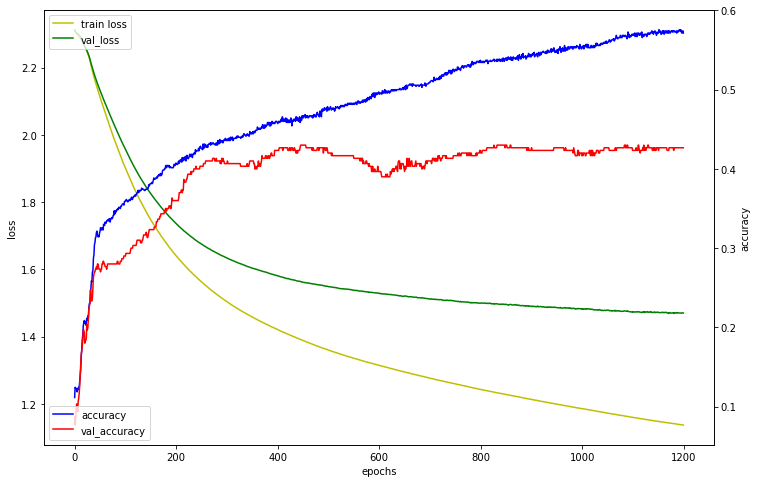

In [46]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [33]:
# 모델평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)

100/100 [==============================] - 0s 767us/step - loss: 1.4949 - accuracy: 0.4531


In [34]:
print('loss : ', loss_and_metrics[0])
print('accuracy : ', loss_and_metrics[1])

loss :  1.4948962926864624
accuracy :  0.4530999958515167


In [35]:
# 6. 모델 저장 및 로드하기
model.save('model/mnist.h5')

In [36]:
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


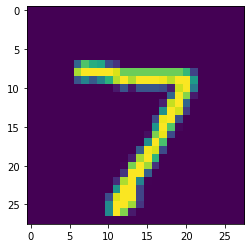

In [37]:
plt.imshow(X_test[0].reshape(28,28))

In [40]:
# 6. 모델 사용하기(예측)
X_test[0].shape

(784,)

In [44]:
result = model2.predict(X_test[10].reshape(1,784))
print('예측치 :', result.argmax() )
print('실제값 :', Y_test[10].argmax())

예측치 : 6
실제값 : 0


# ※ 콜백함수1

In [48]:
import tensorflow as tf
class CustomeHistory(tf.keras.callbacks.Callback): # on_epoch_end()
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch % 50 == 0:
            print("epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}".\
                 format(self.epoch, logs.get('loss'),
                       logs.get('accuracy'),
                       logs.get('val_loss'),
                       logs.get('val_accuracy') ) )

# 1. 데이터 셋 준비하기
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test  = X_test.reshape(10000, 784).astype('float32') / 255.0
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs   = np.random.choice(10000, 300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원핫인코딩 = 라벨링전환
Y_train = utils.to_categorical(Y_train, 10)
Y_val   = utils.to_categorical(Y_val, 10)
Y_test  = utils.to_categorical(Y_test, 10)

# 2. 모델 구성하기
# from tensorflow.keras.layers import Activation
# relu = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])


# 4. 모델 학습시키기
customeHistory = CustomeHistory()
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                validation_data=(X_val, Y_val),
                callbacks=[customeHistory], verbose=0)

epoch:50, loss:2.035017967224121, acc:0.28285714983940125, val_loss:2.0877926349639893, val_acc:0.25
epoch:100, loss:1.8873426914215088, acc:0.3157142996788025, val_loss:1.9418485164642334, val_acc:0.3033333420753479
epoch:150, loss:1.760519027709961, acc:0.36000001430511475, val_loss:1.8086568117141724, val_acc:0.3633333444595337
epoch:200, loss:1.6447572708129883, acc:0.41285714507102966, val_loss:1.6936171054840088, val_acc:0.41999998688697815
epoch:250, loss:1.5387730598449707, acc:0.4571428596973419, val_loss:1.5934888124465942, val_acc:0.4699999988079071
epoch:300, loss:1.4435458183288574, acc:0.4871428608894348, val_loss:1.5058166980743408, val_acc:0.47999998927116394
epoch:350, loss:1.364976406097412, acc:0.5242857336997986, val_loss:1.4406180381774902, val_acc:0.4833333194255829
epoch:400, loss:1.302545189857483, acc:0.5428571701049805, val_loss:1.392410397529602, val_acc:0.503333330154419
epoch:450, loss:1.252257227897644, acc:0.5557143092155457, val_loss:1.3569287061691284, 

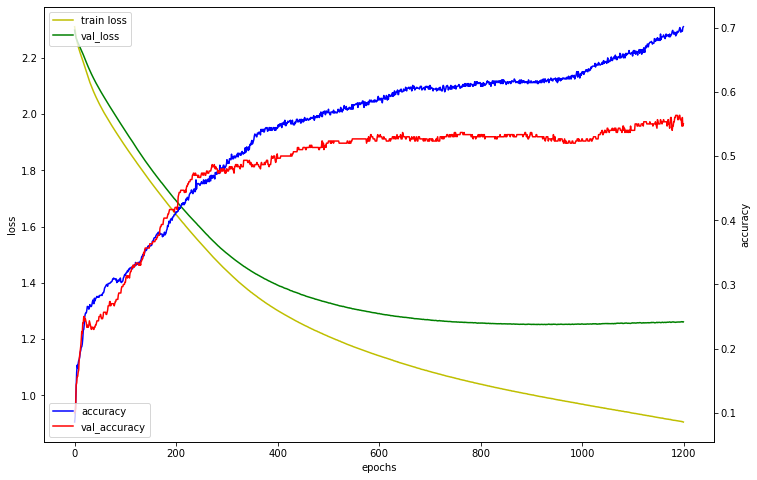

In [49]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# ※ 콜백함수2 - Early Stopping
    * val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [5]:
# 1. 데이터 셋 준비하기
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test  = X_test.reshape(10000, 784).astype('float32') / 255.0
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs   = np.random.choice(10000, 300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원핫인코딩 = 라벨링전환
Y_train = utils.to_categorical(Y_train, 10)
Y_val   = utils.to_categorical(Y_val, 10)
Y_test  = utils.to_categorical(Y_test, 10)

# 2. 모델 구성하기
# from tensorflow.keras.layers import Activation
# relu = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])


# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=1) # 성급한 조기종료
earlyStopping = EarlyStopping(patience=30) # 성급한 조기종료
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=100,
                validation_data=(X_val, Y_val),
                callbacks=[earlyStopping])

Epoch 1/3000
7/7 [==============================] - 0s 21ms/step - loss: 2.3030 - accuracy: 0.1057 - val_loss: 2.3132 - val_accuracy: 0.1233
Epoch 2/3000
7/7 [==============================] - 0s 4ms/step - loss: 2.2916 - accuracy: 0.1171 - val_loss: 2.3031 - val_accuracy: 0.1267
Epoch 3/3000
7/7 [==============================] - 0s 4ms/step - loss: 2.2826 - accuracy: 0.1229 - val_loss: 2.2955 - val_accuracy: 0.1400
Epoch 4/3000
7/7 [==============================] - 0s 5ms/step - loss: 2.2745 - accuracy: 0.1186 - val_loss: 2.2887 - val_accuracy: 0.1433
Epoch 5/3000
7/7 [==============================] - 0s 6ms/step - loss: 2.2668 - accuracy: 0.1186 - val_loss: 2.2824 - val_accuracy: 0.1367
Epoch 6/3000
7/7 [==============================] - 0s 4ms/step - loss: 2.2594 - accuracy: 0.1329 - val_loss: 2.2758 - val_accuracy: 0.1400
Epoch 7/3000
7/7 [==============================] - 0s 4ms/step - loss: 2.2521 - accuracy: 0.1386 - val_loss: 2.2694 - val_accuracy: 0.1400
Epoch 8/3000
7/7 [=

Epoch 59/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.9873 - accuracy: 0.3114 - val_loss: 2.0393 - val_accuracy: 0.2867
Epoch 60/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.9831 - accuracy: 0.3171 - val_loss: 2.0359 - val_accuracy: 0.2900
Epoch 61/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.9789 - accuracy: 0.3100 - val_loss: 2.0322 - val_accuracy: 0.2900
Epoch 62/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.9749 - accuracy: 0.3086 - val_loss: 2.0275 - val_accuracy: 0.3033
Epoch 63/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.9706 - accuracy: 0.3114 - val_loss: 2.0235 - val_accuracy: 0.3033
Epoch 64/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.9662 - accuracy: 0.3143 - val_loss: 2.0200 - val_accuracy: 0.3000
Epoch 65/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.9620 - accuracy: 0.3157 - val_loss: 2.0160 - val_accuracy: 0.3033
Epoch 66/3000

Epoch 117/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.7666 - accuracy: 0.3443 - val_loss: 1.8318 - val_accuracy: 0.3567
Epoch 118/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.7635 - accuracy: 0.3443 - val_loss: 1.8289 - val_accuracy: 0.3600
Epoch 119/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.7606 - accuracy: 0.3471 - val_loss: 1.8260 - val_accuracy: 0.3600
Epoch 120/3000
7/7 [==============================] - 0s 5ms/step - loss: 1.7577 - accuracy: 0.3471 - val_loss: 1.8230 - val_accuracy: 0.3533
Epoch 121/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.7546 - accuracy: 0.3386 - val_loss: 1.8201 - val_accuracy: 0.3500
Epoch 122/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.7518 - accuracy: 0.3457 - val_loss: 1.8174 - val_accuracy: 0.3533
Epoch 123/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.7487 - accuracy: 0.3457 - val_loss: 1.8147 - val_accuracy: 0.3500
Epoch 

Epoch 175/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6306 - accuracy: 0.4057 - val_loss: 1.7031 - val_accuracy: 0.3733
Epoch 176/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6286 - accuracy: 0.4057 - val_loss: 1.7014 - val_accuracy: 0.3700
Epoch 177/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6268 - accuracy: 0.4100 - val_loss: 1.6997 - val_accuracy: 0.3700
Epoch 178/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.6252 - accuracy: 0.4129 - val_loss: 1.6980 - val_accuracy: 0.3700
Epoch 179/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6234 - accuracy: 0.4129 - val_loss: 1.6965 - val_accuracy: 0.3700
Epoch 180/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6215 - accuracy: 0.4200 - val_loss: 1.6947 - val_accuracy: 0.3700
Epoch 181/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6200 - accuracy: 0.4186 - val_loss: 1.6930 - val_accuracy: 0.3700
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.5411 - accuracy: 0.4657 - val_loss: 1.6195 - val_accuracy: 0.4133
Epoch 233/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.5396 - accuracy: 0.4686 - val_loss: 1.6183 - val_accuracy: 0.4133
Epoch 234/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.5383 - accuracy: 0.4686 - val_loss: 1.6171 - val_accuracy: 0.4100
Epoch 235/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.5368 - accuracy: 0.4743 - val_loss: 1.6158 - val_accuracy: 0.4100
Epoch 236/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.5355 - accuracy: 0.4671 - val_loss: 1.6146 - val_accuracy: 0.4167
Epoch 237/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.5343 - accuracy: 0.4700 - val_loss: 1.6135 - val_accuracy: 0.4200
Epoch 238/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.5329 - accuracy: 0.4700 - val_loss: 1.6120 - val_accuracy: 0.4200
Epoch 239/3000
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.4675 - accuracy: 0.5129 - val_loss: 1.5520 - val_accuracy: 0.4733
Epoch 290/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.4664 - accuracy: 0.5114 - val_loss: 1.5508 - val_accuracy: 0.4767
Epoch 291/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.4650 - accuracy: 0.5057 - val_loss: 1.5498 - val_accuracy: 0.4733
Epoch 292/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4639 - accuracy: 0.5143 - val_loss: 1.5486 - val_accuracy: 0.4767
Epoch 293/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.4626 - accuracy: 0.5071 - val_loss: 1.5476 - val_accuracy: 0.4767
Epoch 294/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4614 - accuracy: 0.5086 - val_loss: 1.5464 - val_accuracy: 0.4767
Epoch 295/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.4602 - accuracy: 0.5114 - val_loss: 1.5453 - val_accuracy: 0.4767
Epoch 296/3000
7/7 [=

Epoch 347/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4000 - accuracy: 0.5486 - val_loss: 1.4914 - val_accuracy: 0.4900
Epoch 348/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3990 - accuracy: 0.5529 - val_loss: 1.4902 - val_accuracy: 0.4867
Epoch 349/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3978 - accuracy: 0.5471 - val_loss: 1.4894 - val_accuracy: 0.4900
Epoch 350/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3967 - accuracy: 0.5529 - val_loss: 1.4883 - val_accuracy: 0.4867
Epoch 351/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3956 - accuracy: 0.5471 - val_loss: 1.4874 - val_accuracy: 0.4900
Epoch 352/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3942 - accuracy: 0.5557 - val_loss: 1.4863 - val_accuracy: 0.4867
Epoch 353/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3932 - accuracy: 0.5557 - val_loss: 1.4853 - val_accuracy: 0.4867
Epoch 

Epoch 405/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3333 - accuracy: 0.5900 - val_loss: 1.4352 - val_accuracy: 0.5200
Epoch 406/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3318 - accuracy: 0.5929 - val_loss: 1.4340 - val_accuracy: 0.5167
Epoch 407/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3306 - accuracy: 0.5957 - val_loss: 1.4331 - val_accuracy: 0.5167
Epoch 408/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3299 - accuracy: 0.5957 - val_loss: 1.4323 - val_accuracy: 0.5200
Epoch 409/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3286 - accuracy: 0.6000 - val_loss: 1.4311 - val_accuracy: 0.5167
Epoch 410/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3275 - accuracy: 0.5971 - val_loss: 1.4302 - val_accuracy: 0.5167
Epoch 411/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3265 - accuracy: 0.5986 - val_loss: 1.4292 - val_accuracy: 0.5200
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 1.2702 - accuracy: 0.6129 - val_loss: 1.3844 - val_accuracy: 0.5400
Epoch 463/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2690 - accuracy: 0.6114 - val_loss: 1.3835 - val_accuracy: 0.5400
Epoch 464/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2681 - accuracy: 0.6143 - val_loss: 1.3829 - val_accuracy: 0.5400
Epoch 465/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2670 - accuracy: 0.6114 - val_loss: 1.3822 - val_accuracy: 0.5433
Epoch 466/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2660 - accuracy: 0.6143 - val_loss: 1.3814 - val_accuracy: 0.5433
Epoch 467/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2649 - accuracy: 0.6157 - val_loss: 1.3806 - val_accuracy: 0.5433
Epoch 468/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2643 - accuracy: 0.6143 - val_loss: 1.3800 - val_accuracy: 0.5467
Epoch 469/3000
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 1.2153 - accuracy: 0.6371 - val_loss: 1.3417 - val_accuracy: 0.5633
Epoch 520/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2147 - accuracy: 0.6357 - val_loss: 1.3409 - val_accuracy: 0.5633
Epoch 521/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2131 - accuracy: 0.6343 - val_loss: 1.3400 - val_accuracy: 0.5600
Epoch 522/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2128 - accuracy: 0.6371 - val_loss: 1.3392 - val_accuracy: 0.5567
Epoch 523/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2116 - accuracy: 0.6357 - val_loss: 1.3388 - val_accuracy: 0.5600
Epoch 524/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2110 - accuracy: 0.6371 - val_loss: 1.3382 - val_accuracy: 0.5600
Epoch 525/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2100 - accuracy: 0.6371 - val_loss: 1.3371 - val_accuracy: 0.5567
Epoch 526/3000
7/7 [=

Epoch 577/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1684 - accuracy: 0.6614 - val_loss: 1.3074 - val_accuracy: 0.5767
Epoch 578/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1676 - accuracy: 0.6643 - val_loss: 1.3072 - val_accuracy: 0.5767
Epoch 579/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.1669 - accuracy: 0.6614 - val_loss: 1.3063 - val_accuracy: 0.5767
Epoch 580/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1659 - accuracy: 0.6629 - val_loss: 1.3058 - val_accuracy: 0.5733
Epoch 581/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.1652 - accuracy: 0.6643 - val_loss: 1.3054 - val_accuracy: 0.5733
Epoch 582/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1647 - accuracy: 0.6614 - val_loss: 1.3049 - val_accuracy: 0.5733
Epoch 583/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.1639 - accuracy: 0.6629 - val_loss: 1.3042 - val_accuracy: 0.5733
Epoch 

Epoch 635/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1267 - accuracy: 0.6671 - val_loss: 1.2802 - val_accuracy: 0.5700
Epoch 636/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1261 - accuracy: 0.6671 - val_loss: 1.2793 - val_accuracy: 0.5767
Epoch 637/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.1260 - accuracy: 0.6629 - val_loss: 1.2796 - val_accuracy: 0.5733
Epoch 638/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1248 - accuracy: 0.6686 - val_loss: 1.2788 - val_accuracy: 0.5700
Epoch 639/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1244 - accuracy: 0.6686 - val_loss: 1.2780 - val_accuracy: 0.5767
Epoch 640/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1236 - accuracy: 0.6671 - val_loss: 1.2777 - val_accuracy: 0.5767
Epoch 641/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.1227 - accuracy: 0.6686 - val_loss: 1.2774 - val_accuracy: 0.5800
Epoch 

Epoch 693/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0910 - accuracy: 0.6714 - val_loss: 1.2595 - val_accuracy: 0.5767
Epoch 694/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0903 - accuracy: 0.6786 - val_loss: 1.2590 - val_accuracy: 0.5767
Epoch 695/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.0898 - accuracy: 0.6757 - val_loss: 1.2586 - val_accuracy: 0.5767
Epoch 696/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0891 - accuracy: 0.6786 - val_loss: 1.2583 - val_accuracy: 0.5767
Epoch 697/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.0886 - accuracy: 0.6800 - val_loss: 1.2580 - val_accuracy: 0.5733
Epoch 698/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.0879 - accuracy: 0.6757 - val_loss: 1.2579 - val_accuracy: 0.5767
Epoch 699/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0879 - accuracy: 0.6743 - val_loss: 1.2576 - val_accuracy: 0.5767
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 1.0603 - accuracy: 0.6814 - val_loss: 1.2441 - val_accuracy: 0.5767
Epoch 751/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0601 - accuracy: 0.6814 - val_loss: 1.2440 - val_accuracy: 0.5800
Epoch 752/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0589 - accuracy: 0.6829 - val_loss: 1.2437 - val_accuracy: 0.5800
Epoch 753/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.0589 - accuracy: 0.6829 - val_loss: 1.2434 - val_accuracy: 0.5767
Epoch 754/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0584 - accuracy: 0.6800 - val_loss: 1.2430 - val_accuracy: 0.5767
Epoch 755/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0578 - accuracy: 0.6814 - val_loss: 1.2429 - val_accuracy: 0.5767
Epoch 756/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0571 - accuracy: 0.6814 - val_loss: 1.2428 - val_accuracy: 0.5800
Epoch 757/3000
7/7 [=

Epoch 808/3000
7/7 [==============================] - 0s 5ms/step - loss: 1.0321 - accuracy: 0.6857 - val_loss: 1.2318 - val_accuracy: 0.5833
Epoch 809/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0317 - accuracy: 0.6886 - val_loss: 1.2316 - val_accuracy: 0.5833
Epoch 810/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.0314 - accuracy: 0.6914 - val_loss: 1.2318 - val_accuracy: 0.5900
Epoch 811/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0310 - accuracy: 0.6857 - val_loss: 1.2317 - val_accuracy: 0.5867
Epoch 812/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0303 - accuracy: 0.6886 - val_loss: 1.2317 - val_accuracy: 0.5900
Epoch 813/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0297 - accuracy: 0.6886 - val_loss: 1.2313 - val_accuracy: 0.5900
Epoch 814/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.0297 - accuracy: 0.6886 - val_loss: 1.2311 - val_accuracy: 0.5867
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 1.0074 - accuracy: 0.6914 - val_loss: 1.2237 - val_accuracy: 0.5967
Epoch 866/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0073 - accuracy: 0.6943 - val_loss: 1.2230 - val_accuracy: 0.5933
Epoch 867/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0067 - accuracy: 0.6929 - val_loss: 1.2228 - val_accuracy: 0.5967
Epoch 868/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0061 - accuracy: 0.6943 - val_loss: 1.2228 - val_accuracy: 0.5933
Epoch 869/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0059 - accuracy: 0.6929 - val_loss: 1.2227 - val_accuracy: 0.5933
Epoch 870/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.0055 - accuracy: 0.6929 - val_loss: 1.2226 - val_accuracy: 0.5933
Epoch 871/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.0049 - accuracy: 0.6943 - val_loss: 1.2225 - val_accuracy: 0.5933
Epoch 872/3000
7/7 [=

Epoch 923/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.9845 - accuracy: 0.7000 - val_loss: 1.2153 - val_accuracy: 0.6067
Epoch 924/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9841 - accuracy: 0.6971 - val_loss: 1.2149 - val_accuracy: 0.6067
Epoch 925/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9838 - accuracy: 0.6957 - val_loss: 1.2148 - val_accuracy: 0.6067
Epoch 926/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9832 - accuracy: 0.6971 - val_loss: 1.2146 - val_accuracy: 0.6067
Epoch 927/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9830 - accuracy: 0.6986 - val_loss: 1.2148 - val_accuracy: 0.6067
Epoch 928/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9829 - accuracy: 0.6986 - val_loss: 1.2146 - val_accuracy: 0.6067
Epoch 929/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9830 - accuracy: 0.6971 - val_loss: 1.2140 - val_accuracy: 0.6067
Epoch 

Epoch 981/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9637 - accuracy: 0.7014 - val_loss: 1.2084 - val_accuracy: 0.6067
Epoch 982/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9632 - accuracy: 0.7014 - val_loss: 1.2081 - val_accuracy: 0.6033
Epoch 983/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9629 - accuracy: 0.7014 - val_loss: 1.2078 - val_accuracy: 0.6000
Epoch 984/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9626 - accuracy: 0.7029 - val_loss: 1.2076 - val_accuracy: 0.6000
Epoch 985/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9623 - accuracy: 0.7029 - val_loss: 1.2076 - val_accuracy: 0.6000
Epoch 986/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9625 - accuracy: 0.7014 - val_loss: 1.2076 - val_accuracy: 0.6033
Epoch 987/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9628 - accuracy: 0.7000 - val_loss: 1.2073 - val_accuracy: 0.6000
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.9446 - accuracy: 0.7071 - val_loss: 1.2038 - val_accuracy: 0.6067
Epoch 1039/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9441 - accuracy: 0.7100 - val_loss: 1.2034 - val_accuracy: 0.6100
Epoch 1040/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9439 - accuracy: 0.7129 - val_loss: 1.2029 - val_accuracy: 0.6067
Epoch 1041/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9434 - accuracy: 0.7057 - val_loss: 1.2033 - val_accuracy: 0.6100
Epoch 1042/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9431 - accuracy: 0.7100 - val_loss: 1.2030 - val_accuracy: 0.6100
Epoch 1043/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9429 - accuracy: 0.7029 - val_loss: 1.2038 - val_accuracy: 0.6067
Epoch 1044/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9431 - accuracy: 0.7043 - val_loss: 1.2038 - val_accuracy: 0.6033
Epoch 1045/3000

7/7 [==============================] - 0s 3ms/step - loss: 0.9270 - accuracy: 0.7143 - val_loss: 1.1997 - val_accuracy: 0.6133
Epoch 1096/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9267 - accuracy: 0.7157 - val_loss: 1.1998 - val_accuracy: 0.6133
Epoch 1097/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9260 - accuracy: 0.7143 - val_loss: 1.1997 - val_accuracy: 0.6167
Epoch 1098/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9264 - accuracy: 0.7129 - val_loss: 1.1996 - val_accuracy: 0.6133
Epoch 1099/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.9254 - accuracy: 0.7143 - val_loss: 1.1993 - val_accuracy: 0.6133
Epoch 1100/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.9258 - accuracy: 0.7171 - val_loss: 1.1993 - val_accuracy: 0.6133
Epoch 1101/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9250 - accuracy: 0.7114 - val_loss: 1.1996 - val_accuracy: 0.6100
Epoch 1102/3000

7/7 [==============================] - 0s 4ms/step - loss: 0.9094 - accuracy: 0.7186 - val_loss: 1.1964 - val_accuracy: 0.6167
Epoch 1153/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9092 - accuracy: 0.7200 - val_loss: 1.1964 - val_accuracy: 0.6167
Epoch 1154/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9090 - accuracy: 0.7186 - val_loss: 1.1969 - val_accuracy: 0.6167
Epoch 1155/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9089 - accuracy: 0.7229 - val_loss: 1.1965 - val_accuracy: 0.6167
Epoch 1156/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9082 - accuracy: 0.7186 - val_loss: 1.1962 - val_accuracy: 0.6167
Epoch 1157/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9082 - accuracy: 0.7214 - val_loss: 1.1963 - val_accuracy: 0.6167
Epoch 1158/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.9075 - accuracy: 0.7214 - val_loss: 1.1966 - val_accuracy: 0.6167
Epoch 1159/3000

7/7 [==============================] - 0s 4ms/step - loss: 0.8931 - accuracy: 0.7214 - val_loss: 1.1951 - val_accuracy: 0.6133
Epoch 1210/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8932 - accuracy: 0.7257 - val_loss: 1.1954 - val_accuracy: 0.6133
Epoch 1211/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8929 - accuracy: 0.7214 - val_loss: 1.1947 - val_accuracy: 0.6133
Epoch 1212/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8926 - accuracy: 0.7243 - val_loss: 1.1947 - val_accuracy: 0.6133
Epoch 1213/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.8930 - accuracy: 0.7200 - val_loss: 1.1952 - val_accuracy: 0.6100
Epoch 1214/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.8926 - accuracy: 0.7243 - val_loss: 1.1950 - val_accuracy: 0.6133
Epoch 1215/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8918 - accuracy: 0.7243 - val_loss: 1.1946 - val_accuracy: 0.6133
Epoch 1216/3000

7/7 [==============================] - 0s 4ms/step - loss: 0.8784 - accuracy: 0.7257 - val_loss: 1.1947 - val_accuracy: 0.6200
Epoch 1267/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8779 - accuracy: 0.7257 - val_loss: 1.1947 - val_accuracy: 0.6200
Epoch 1268/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8780 - accuracy: 0.7286 - val_loss: 1.1948 - val_accuracy: 0.6200
Epoch 1269/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8776 - accuracy: 0.7243 - val_loss: 1.1950 - val_accuracy: 0.6200
Epoch 1270/3000
7/7 [==============================] - 0s 3ms/step - loss: 0.8773 - accuracy: 0.7271 - val_loss: 1.1947 - val_accuracy: 0.6167
Epoch 1271/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8771 - accuracy: 0.7300 - val_loss: 1.1942 - val_accuracy: 0.6133
Epoch 1272/3000
7/7 [==============================] - 0s 4ms/step - loss: 0.8768 - accuracy: 0.7271 - val_loss: 1.1943 - val_accuracy: 0.6133
Epoch 1273/3000

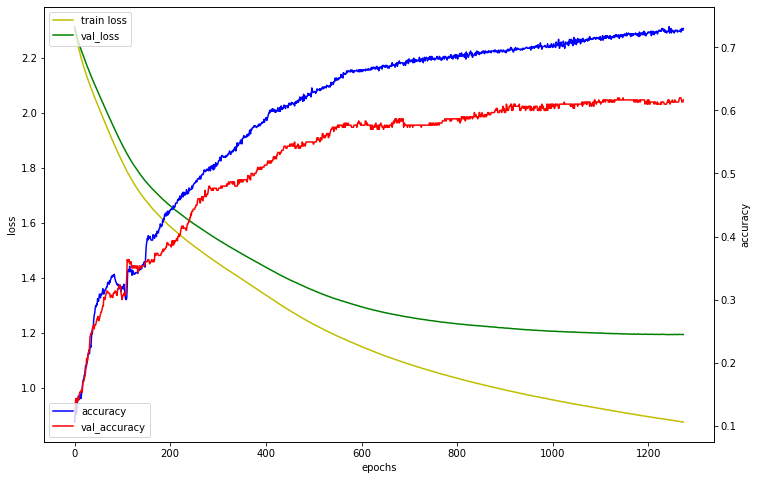

In [6]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 위 모델 (DNN)의 accuracy 늘리기
<ul>
    <li> 데이터 확보</li>
    <li> 레이어 </li>
    <li> 활성화함수 : 은닉층에는 주로 relu, elu,
        output layer에는 sigmoid(이진분류), softmax(다중분류)</li>
    <li> optimizer, epoch 등을 조정</li>

In [7]:
# 1. 데이터 셋 준비하기
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test  = X_test.reshape(10000, 784).astype('float32') / 255.0
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
# train_rand_idxs = np.random.choice(50000, 700)
# val_rand_idxs   = np.random.choice(10000, 300)
# X_train = X_train[train_rand_idxs]
# Y_train = Y_train[train_rand_idxs]
# X_val = X_val[val_rand_idxs]
# Y_val = Y_val[val_rand_idxs]
# 원핫인코딩 = 라벨링전환
Y_train = utils.to_categorical(Y_train, 10)
Y_val   = utils.to_categorical(Y_val, 10)
Y_test  = utils.to_categorical(Y_test, 10)

# 2. 모델 구성하기
# from tensorflow.keras.layers import Activation
# relu = Activation('relu')
model = Sequential()
model.add(Dense(units=612, input_dim=784, activation="relu"))
model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=1) # 성급한 조기종료
earlyStopping = EarlyStopping(patience=50) # 적절한 조기종료
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=100,
                validation_data=(X_val, Y_val),
                callbacks=[earlyStopping])

Epoch 1/3000
500/500 [==============================] - 5s 10ms/step - loss: 1.0383 - accuracy: 0.7678 - val_loss: 0.4285 - val_accuracy: 0.8925
Epoch 2/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.3931 - accuracy: 0.8945 - val_loss: 0.3072 - val_accuracy: 0.9131
Epoch 3/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.3170 - accuracy: 0.9104 - val_loss: 0.2687 - val_accuracy: 0.9260
Epoch 4/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.2797 - accuracy: 0.9198 - val_loss: 0.2444 - val_accuracy: 0.9294
Epoch 5/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.2535 - accuracy: 0.9278 - val_loss: 0.2225 - val_accuracy: 0.9371
Epoch 6/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.2330 - accuracy: 0.9335 - val_loss: 0.2116 - val_accuracy: 0.9418
Epoch 7/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.2158 - accuracy: 0.9378 - val_loss: 0.1971 - val_acc

500/500 [==============================] - 5s 9ms/step - loss: 0.0226 - accuracy: 0.9957 - val_loss: 0.0747 - val_accuracy: 0.9792
Epoch 58/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.0218 - accuracy: 0.9960 - val_loss: 0.0765 - val_accuracy: 0.9776
Epoch 59/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.0209 - accuracy: 0.9963 - val_loss: 0.0742 - val_accuracy: 0.9787
Epoch 60/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.0201 - accuracy: 0.9964 - val_loss: 0.0754 - val_accuracy: 0.9779
Epoch 61/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.0195 - accuracy: 0.9966 - val_loss: 0.0743 - val_accuracy: 0.9800
Epoch 62/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.0187 - accuracy: 0.9972 - val_loss: 0.0730 - val_accuracy: 0.9794
Epoch 63/3000
500/500 [==============================] - 5s 10ms/step - loss: 0.0180 - accuracy: 0.9972 - val_loss: 0.0736 - val_accuracy: 0.

500/500 [==============================] - 5s 9ms/step - loss: 0.0041 - accuracy: 0.9999 - val_loss: 0.0766 - val_accuracy: 0.9800
Epoch 114/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.0772 - val_accuracy: 0.9803
Epoch 115/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 0.0769 - val_accuracy: 0.9800
Epoch 116/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.0780 - val_accuracy: 0.9799
Epoch 117/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.0771 - val_accuracy: 0.9800
Epoch 118/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 0.0767 - val_accuracy: 0.9803
Epoch 119/3000
500/500 [==============================] - 5s 9ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0779 - val_accuracy: 